In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from PIL import Image
import glob
import random
import pandas as pd

In [2]:
files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/train/hotdog/*.jpg")
TrainData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,1))

files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/train/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,0))

print("Done.")

random.shuffle(TrainData)

Done.


In [3]:
files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/test/hotdog/*.jpg")
TestData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,1))

files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/test/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,0))

print("Done.")

random.shuffle(TestData)

Done.


In [4]:
print("Train Data ",len(TrainData))
print("Test Data ",len(TestData))

Train Data  3000
Test Data  644


In [5]:
Train_X = np.array([item[0] for item in TrainData])
Train_Y = np.array([item[1] for item in TrainData])

Test_X = np.array([item[0] for item in TestData])
Test_Y = np.array([item[1] for item in TestData])

Train_X = Train_X.astype('float32')
Test_X = Test_X.astype('float32')

Train_X /= 255
Test_X /= 255

In [6]:
model = keras.Sequential([
    keras.layers.AveragePooling2D((2,2),2,input_shape=(299,299,3)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])



In [7]:
model.compile(optimizer ='adam',loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [8]:
model.fit(Train_X, Train_Y, epochs = 50, batch_size = 100)

Epoch 1/50
30/30 [==============================] - 74s 2s/step - loss: 0.6966 - accuracy: 0.5030
Epoch 2/50
30/30 [==============================] - 64s 2s/step - loss: 0.6920 - accuracy: 0.5173
Epoch 3/50
30/30 [==============================] - 65s 2s/step - loss: 0.6899 - accuracy: 0.5300
Epoch 4/50
30/30 [==============================] - 54s 2s/step - loss: 0.6776 - accuracy: 0.5763
Epoch 5/50
30/30 [==============================] - 54s 2s/step - loss: 0.6283 - accuracy: 0.6507
Epoch 6/50
30/30 [==============================] - 54s 2s/step - loss: 0.6134 - accuracy: 0.6780
Epoch 7/50
30/30 [==============================] - 54s 2s/step - loss: 0.6144 - accuracy: 0.6707
Epoch 8/50
30/30 [==============================] - 54s 2s/step - loss: 0.6073 - accuracy: 0.6770
Epoch 9/50
30/30 [==============================] - 58s 2s/step - loss: 0.6012 - accuracy: 0.6870
Epoch 10/50
30/30 [==============================] - 54s 2s/step - loss: 0.5907 - accuracy: 0.6923
Epoch 11/50
30/30 [

In [9]:
model.evaluate(Test_X,Test_Y)

21/21 [==============================] - 7s 154ms/step - loss: 0.8408 - accuracy: 0.6879


[0.8408270478248596, 0.6878882050514221]

In [12]:
Test_X

array([[[[0.00392157, 0.00392157, 0.        ],
         [0.00784314, 0.00784314, 0.        ],
         [0.        , 0.00392157, 0.        ],
         ...,
         [0.5294118 , 0.5372549 , 0.5254902 ],
         [0.5176471 , 0.5254902 , 0.5137255 ],
         [0.5137255 , 0.5137255 , 0.5058824 ]],

        [[0.00392157, 0.00392157, 0.        ],
         [0.00784314, 0.01568628, 0.00392157],
         [0.        , 0.00784314, 0.00392157],
         ...,
         [0.59607846, 0.6039216 , 0.5921569 ],
         [0.5803922 , 0.5882353 , 0.5764706 ],
         [0.57254905, 0.57254905, 0.5647059 ]],

        [[0.00784314, 0.01568628, 0.01176471],
         [0.        , 0.00392157, 0.        ],
         [0.04705882, 0.05098039, 0.05882353],
         ...,
         [0.61960787, 0.61960787, 0.6117647 ],
         [0.6156863 , 0.6156863 , 0.60784316],
         [0.6156863 , 0.6156863 , 0.60784316]],

        ...,

        [[0.29411766, 0.24705882, 0.15294118],
         [0.28627452, 0.23921569, 0.14509805]

In [10]:
Predictions = model.predict(Test_X)

21/21 [==============================] - 3s 122ms/step


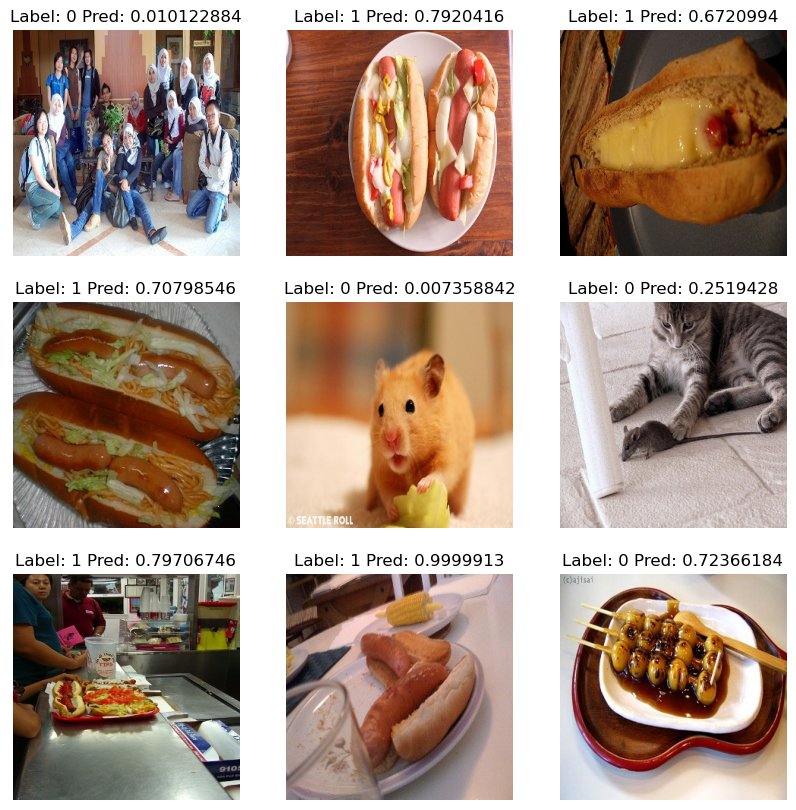

In [11]:
plt.figure(figsize=(10, 10))
a = 95
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Test_X[i+a])
    plt.title("Label: "+str(Test_Y[i+a])+" Pred: "+str(Predictions[i+a][0]))
    plt.axis("off")